### HandWritten Digits Classification
Basic MNIST HandWritten Data Classficiation
(From the youtube channel CodeBasics)

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train),len(X_train),X_train.shape

(60000, 60000, (60000, 28, 28))

In [4]:
# Reshaping the arrays into 60,000 images of 24*24 or 784 bit pixel arrays
X_train_flat = X_train.reshape(len(X_train),784)
X_test_flat  = X_test.reshape(len(X_test),784)
X_train_flat.shape,X_test_flat.shape

((60000, 784), (10000, 784))

In [5]:
# Creating a simple Keras Neural Network with 784 input nodes and 10 output nodes
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

In [6]:
# We are going to use SGD as optimizer which is short for Stochaistc Gradient Descent
model.compile(optimizer = 'SGD',loss = 'mean_squared_error',metrics = ['accuracy'])

In [7]:
#Training the model
model.fit(X_train_flat,Y_train,epochs =5)

Epoch 1/5
1875/1875 [==============================] - 2s 911us/step - loss: 20.2845 - accuracy: 0.0986
Epoch 2/5
1875/1875 [==============================] - 1s 721us/step - loss: 20.2775 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 1s 691us/step - loss: 20.2775 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 1s 672us/step - loss: 20.2774 - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 1s 707us/step - loss: 20.2774 - accuracy: 0.0987 0s - loss: 20.2887 - accuracy: 0.099


In [8]:
# TEsting the model using test data
model.evaluate(X_test_flat,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 20.2423 - accuracy: 0.0980


[20.242290496826172, 0.09799999743700027]

Oh Damn! This is bad, 0.98%? My ass can count detect better than that.
I could try a new approach. Let's see what further code does
#### Tweaking model a bit and also scaling the input

In [9]:
X1_train_flat = X_train_flat/255
X1_test_flat  = X_test_flat /255

In [10]:
# Trying the same model here again, but with scaled inputs
model2 = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

In [11]:
# Changed optimizer from SGD to adam, i read on the internet that it can do wonders!
model2.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [12]:
model2.fit(X1_train_flat,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 968us/step - loss: 0.4873 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 2s 955us/step - loss: 0.3063 - accuracy: 0.91580s - loss: 0.3057 - accura
Epoch 3/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.2855 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 837us/step - loss: 0.2747 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 871us/step - loss: 0.2679 - accuracy: 0.9264


In [13]:
model2.evaluate(X1_test_flat,Y_test)

313/313 [==============================] - 0s 784us/step - loss: 0.2657 - accuracy: 0.9262


[0.2656952738761902, 0.9261999726295471]

Damn! 92% accuracy from 0.98% That some serious jump dawg! Awesome!

(<matplotlib.image.AxesImage at 0x242b279c910>, 0.73639405)

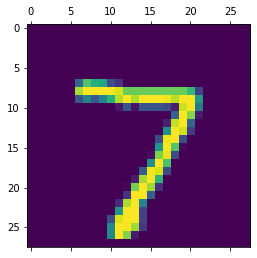

In [14]:
#Playing with the output and drawing a confusion matrix
y_predicted = model2.predict(X1_test_flat)
plt.matshow(X_test[0]),max(y_predicted[0])

In [16]:
Y_predicted_labels = [np.argmax(i) for i in y_predicted]
confu_mat = tf.math.confusion_matrix(labels= Y_test,predictions=Y_predicted_labels)
confu_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1112,    4,    2,    0,    1,    4,    2,   10,    0],
       [   4,    9,  935,   12,    7,    5,   12,    9,   34,    5],
       [   4,    0,   22,  926,    0,   18,    2,    9,   22,    7],
       [   1,    1,    6,    1,  897,    0,   13,    4,   10,   49],
       [  10,    3,    3,   35,    6,  771,   19,    4,   34,    7],
       [  11,    3,    7,    1,    7,    9,  917,    2,    1,    0],
       [   1,    7,   27,    9,    7,    1,    0,  930,    2,   44],
       [   7,    7,    8,   20,    8,   22,   11,    7,  877,    7],
       [  10,    7,    1,   10,   18,    6,    0,   14,    7,  936]])>

In [18]:
#Finally trying to use a hidden layer and checking
model3 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [19]:
#using the same parameters as model3
model3.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X1_train_flat,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 20.3692 - accuracy: 0.0777A: 1s - loss: 20
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 20.2956 - accuracy: 0.0778
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 20.2887 - accuracy: 0.0782
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 20.2857 - accuracy: 0.0784A
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 20.2840 - accuracy: 0.0783


This is bad!!

In [22]:
#Using Flatten layer so that we don't have to call reshape again on input dataset
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

In [23]:
model4.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
model4.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 3.5063 - accuracy: 0.2691
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 3.2567 - accuracy: 0.3929
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.4344 - accuracy: 0.3848
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0282 - accuracy: 0.3195
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0235 - accuracy: 0.3334
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9965 - accuracy: 0.3216
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9144 - accuracy: 0.3345
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8168 - accuracy: 0.3850
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8815 - accuracy: 0.3326
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.771

Not bad...but single layer was much more good at predicting...adding that extra layer...just messed everything up